# Resources

- [Blog post](https://pub.towardsai.net/lasso-l1-vs-ridge-l2-vs-elastic-net-regularization-for-classification-model-409c3d86f6e9) for this notebook
- Video tutorial on [YouTube](https://www.youtube.com/watch?v=PAOkp9CEn58&list=PLVppujud2yJrTGSjtN7j8gqCthOVyyk4W&index=1)
- Python code is at the end of the post. Click [here](https://mailchi.mp/a30206d20b9a/in5ymnmlkv) for the notebook.
- More video tutorials on [Overfitting Correction](https://www.youtube.com/playlist?list=PLVppujud2yJrTGSjtN7j8gqCthOVyyk4W)
- More blog posts on [Overfitting Correction](https://medium.com/@AmyGrabNGoInfo/list/overfitting-correction-2fb2052285d6)


For more information about data science and machine learning, please check out my [YouTube channel](https://www.youtube.com/channel/UCmbA7XB6Wb7bLwJw9ARPcYg), [Medium Page](https://medium.com/@AmyGrabNGoInfo) and [GrabNGoInfo.com](https://grabngoinfo.com/tutorials/), or follow GrabNGoInfo on [LinkedIn](https://www.linkedin.com/company/grabngoinfo/).

# Intro

LASSO (Least Absolute Shrinkage and Selection Operator) is also called L1 regularization, and Ridge is also called L2 regularization. Elastic Net is the combination of LASSO and Ridge. All three are techniques commonly used in machine learning to correct overfitting.

In this tutorial, we will cover
* What's the difference between LASSO (L1), Ridge (L2), and Elastic Net?
* How to run LASSO for classification model using Python `sklearn`?
* How to run Ridge for classification model using Python `sklearn`?
* How to run Elastic Net for classification model using Python `sklearn`?
* How to compare the performance of LASSO, Ridge, and Elastic Net?

Let's get started!

# Step 0: LASSO (L1) vs Ridge (L2) vs. Elastic Net

In step 0, we will talk about the differences between LASSO, Ridge, and elastic net.

LASSO and Ridge regularization correct overfitting by shrinking the coefficient of the model. During the model training process, instead of minimizing the model training error, they minimize the model training error plus a penalty term. LASSO and Ridge have different calculation algorithms for the penalty term. Elastic net's penalty term is a combination of the algorithm from LASSO and Ridge.

* The penalty term has a parameter called lambda. It controls the strength of the penalty.
 * When lambda equals 0, the penalty term equals 0. So the model is a model with no regularization.
 * When lambda increases, the penalty term value increases, and the model coefficients values decrease.
 * When lambda goes infinity, the model coefficients shrink to nearly 0. The model is left with only the intercept, which predicts the average value for every data point.
*   LASSO's penalty term is the penalty parameter lambda multiplied by the sum of the absolute value of the coefficients. Because LASSO's coefficients may shrink to zeros, it can be used for automatic feature selection.
*   Ridge shrinks the model coefficients based on the sum of the squared coefficients. Ridge does not shrink the model coefficients to zero.
*   Elastic net's penalty term is a combination of LASSO and Ridge regression's penalty term. It sets some coefficients to zeros, but the number is smaller than LASSO.

# Step 1: Import Libraries

In the first step, let's import the Python libraries needed for this tutorial.

We will use the breast cancer dataset for this tutorial, so `datasets` from `sklearn` needs to be imported. `pandas` and `numpy` are imported for data processing. `matplotlib` is for visualization, and `StandardScaler` is for data standardization.

For model training, we imported train_test_split and LogisticRegression.

For model performance evaluation, we imported `plot_confusion_matrix`, `classification_report`, `log_loss`, `roc_curve`, and `roc_auc_score`.

In [ ]:
# Dataset
from sklearn import datasets

# Data processing
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt

# Standardize the data
from sklearn.preprocessing import StandardScaler

# Model and performance evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, classification_report, log_loss, roc_curve, roc_auc_score


# Step 2: Read In Data

In the second step, the breast cancer data from `sklearn` library is loaded and transformed into a pandas dataframe.

The information summary shows that the dataset has 569 records and 31 columns.

In [ ]:
# Load the breast cancer dataset
data = datasets.load_breast_cancer()

# Put the data in pandas dataframe format
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target']=data.target

# Check the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

The target variable distribution shows 63% of ones and 37% of zeros in the dataset. Therefore, one means the patient has breast cancer, and 0 represents the patient does not have breast cancer.

In [ ]:
# Check the target value distribution
df['target'].value_counts(normalize=True)

1    0.627417
0    0.372583
Name: target, dtype: float64

# Step 3: Train Test Split

In step 3, we split the dataset into 80% training and 20% testing dataset. `random_state` makes the random split results reproducible.

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(df[df.columns.difference(['target'])], df['target'], test_size=0.2, random_state=42)

# Check the number of records in training and testing dataset.
print(f'The training dataset has {len(X_train)} records.')
print(f'The testing dataset has {len(X_test)} records.')

The training dataset has 455 records.
The testing dataset has 114 records.


The training dataset has 455 records, and the testing dataset has 114 records.

# Step 4: Standardization

Standardization is to rescale the features to the same scale. It is calculated by extracting the mean and divided by the standard deviation. After standardization, each feature has zero mean and unit standard deviation.

Standardization should be fit on the training dataset only to prevent test dataset information from leaking into the training process. Then, the test dataset is standardized using the fitting results from the training dataset.

There are different types of scalers. StandardScaler and MinMaxScaler are most commonly used. For a dataset with outliers, we can use RobustScaler.

In this tutorial, we will use `StandardScaler`.

In [ ]:
# Initiate scaler
sc = StandardScaler()

# Standardize the training dataset
X_train_transformed = pd.DataFrame(sc.fit_transform(X_train),index=X_train.index, columns=X_train.columns)

# Standardized the testing dataset
X_test_transformed = pd.DataFrame(sc.transform(X_test),index=X_test.index, columns=X_test.columns)

# Summary statistics after standardization
X_train_transformed.describe().T

,count,mean,std,min,25%,50%,75%,max
area error,455.0,1.561632e-17,1.001101,-0.705091,-0.464164,-0.325347,0.077435,10.641841
compactness error,455.0,-2.401498e-15,1.001101,-1.258102,-0.694353,-0.280607,0.358304,5.905671
concave points error,455.0,3.279428e-16,1.001101,-1.891775,-0.668493,-0.126279,0.437566,6.504667
concavity error,455.0,2.347329e-16,1.001101,-1.022218,-0.551340,-0.207836,0.303371,11.310294
fractal dimension error,455.0,5.050905e-16,1.001101,-1.050856,-0.573964,-0.218908,0.245340,9.345870
mean area,455.0,-2.627935e-16,1.001101,-1.365036,-0.660205,-0.289597,0.319339,5.208312
mean compactness,455.0,1.003349e-15,1.001101,-1.607228,-0.777087,-0.241340,0.528128,3.964311
mean concave points,455.0,5.780480e-16,1.001101,-1.269910,-0.734905,-0.391123,0.673757,4.022271
mean concavity,455.0,9.782163e-16,1.001101,-1.119899,-0.750539,-0.344646,0.547387,4.256736
mean fractal dimension,455.0,-3.347993e-15,1.001101,-1.776889,-0.709792,-0.177285,0.464223,4.815921


We can see that after using StandardScaler, all the features have zero mean and unit standard deviation.

Let's get the summary statistics for the training data before standardization as well, and we can see that the mean and standard deviation can be very different in scale. For example, the area error has a mean value of 40 and a standard deviation of 47. On the other hand, the compactness error has a mean of about 0.023 and a standard deviation of 0.019.

In [ ]:
# Summary statistics before standardization
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
area error,455.0,40.071299,47.236319,6.802000,18.170000,24.720000,43.725000,542.20000
compactness error,455.0,0.025635,0.018607,0.002252,0.012730,0.020420,0.032295,0.13540
concave points error,455.0,0.011894,0.006294,0.000000,0.007691,0.011100,0.014645,0.05279
concavity error,455.0,0.032824,0.032146,0.000000,0.015120,0.026150,0.042565,0.39600
fractal dimension error,455.0,0.003820,0.002787,0.000895,0.002222,0.003211,0.004504,0.02984
mean area,455.0,654.377582,354.943187,170.400000,420.300000,551.700000,767.600000,2501.00000
mean compactness,455.0,0.103619,0.052470,0.019380,0.062890,0.090970,0.131300,0.31140
mean concave points,455.0,0.048280,0.038060,0.000000,0.020340,0.033410,0.073895,0.20120
mean concavity,455.0,0.088898,0.079468,0.000000,0.029320,0.061540,0.132350,0.42680
mean fractal dimension,455.0,0.062757,0.007210,0.049960,0.057645,0.061480,0.066100,0.09744


# Step 5: Logistic Regression With No Regularization

In step 5, we will create a logistic regression with no regularization as the baseline model.

Logistic regression in `sklearn` uses Ridge regularization by default. When checking the default hyperparameter values of the LogisticRegression(), we see that `penalty='l2'`, meaning that L2 regularization is used.

In [ ]:
# Check default values
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

We need to change the `penalty` from `l2` to 'none' to get the model with no regularization. After running the baseline logistic regression model, we also predicted the testing dataset using `.predict` and calculated the predicted probabilities using `.predict_proba`.

In [ ]:
# Run model
logistic = LogisticRegression(penalty='none', random_state=0).fit(X_train_transformed, y_train)

# Make prediction
logistic_prediction = logistic.predict(X_test_transformed)

# Get predicted probability
logistic_pred_Prob = logistic.predict_proba(X_test_transformed)[:,1]


After getting the predicted value and predicted probability, we are ready to check the model performance!

First, let's check the ROC curve. We got the area under curve value of 0.9818.

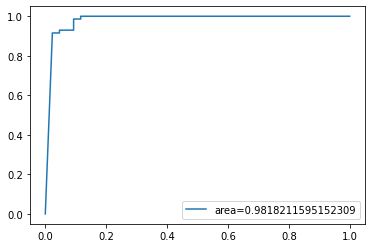

In [ ]:
# Get the false positive rate and true positive rate
fpr,tpr, _=roc_curve(y_test,logistic_pred_Prob)

# Get auc value
auc=roc_auc_score(y_test,logistic_pred_Prob)

# Plot the chart
plt.plot(fpr,tpr,label="area="+str(auc))
plt.legend(loc=4)

The log loss value for the model is 2.02.

In [ ]:
# Caclulate log loss
log_loss(y_test,logistic_pred_Prob)

2.0150517046435854

The confusion matrix shows 1 false positives and 6 false negatives.

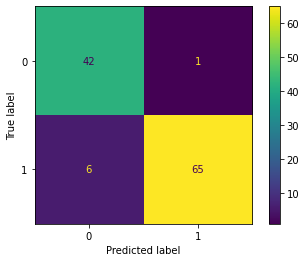

In [ ]:
# Confusion matrix
plot_confusion_matrix(logistic, X_test_transformed, y_test)

A total of 7 incorrect predictions correspond to an accuracy of 0.939.

We do not want to miss any actual cancer patient for the breast cancer prediction and do not mind having a few false positives, so recall would be the metric to pay most attention to. The recall is the true positive rate. It measures the percentage of actual cancer patients captured by the model. We can see that the logistic regression gave us the recall value of 0.915, meaning that 91.5% of the actual cancer patients are captured.

In [ ]:
# Performance report
print(classification_report(y_test, logistic_prediction, digits=3))

              precision    recall  f1-score   support

           0      0.875     0.977     0.923        43
           1      0.985     0.915     0.949        71

    accuracy                          0.939       114
   macro avg      0.930     0.946     0.936       114
weighted avg      0.943     0.939     0.939       114



Next, let's check the coefficients of the model. Based on their absolute values, I ranked the model coefficients from high to low, and we can see the top variables have coefficients in a few hundred.

In [ ]:
# Model coefficients
LogisticCoeff = pd.concat([pd.DataFrame(X_test_transformed.columns),pd.DataFrame(np.transpose(logistic.coef_))], axis = 1)
LogisticCoeff.columns=['Variable','Coefficient']
LogisticCoeff['Coefficient_Abs']=LogisticCoeff['Coefficient'].apply(abs)
LogisticCoeff.sort_values(by='Coefficient_Abs', ascending=False)

,Variable,Coefficient,Coefficient_Abs
6,mean compactness,599.625747,599.625747
7,mean concave points,-579.850455,579.850455
16,radius error,-566.490524,566.490524
3,concavity error,537.731215,537.731215
23,worst concavity,-531.475901,531.475901
9,mean fractal dimension,-367.904097,367.904097
28,worst symmetry,-367.005724,367.005724
0,area error,-364.748996,364.748996
8,mean concavity,-292.316154,292.316154
4,fractal dimension error,286.785065,286.785065


# Step 6: LASSO

In step 6, LASSO model is used to run the same analysis.

`penalty='l1'` means LASSO regularization is applied.

`solver` is an algorithm to use in the optimization problem. There are different types of solvers. For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large datasets.

In [ ]:
# Run model
lasso = LogisticRegression(penalty='l1', solver='liblinear', random_state=0).fit(X_train_transformed, y_train)

# Make prediction
lasso_prediction = lasso.predict(X_test_transformed)

# Get predicted probability
lasso_pred_Prob = lasso.predict_proba(X_test_transformed)[:,1]

The ROC/AUC value is 0.9967 for LASSO, higher than the logistic regression value of 0.9818.

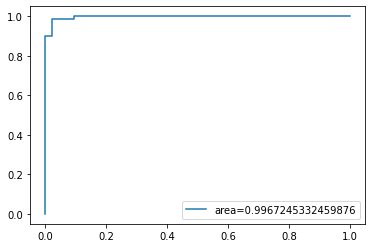

In [ ]:
# Get the false positive rate and true positive rate
fpr,tpr, _= roc_curve(y_test,lasso_pred_Prob)

# Get auc value
auc = roc_auc_score(y_test,lasso_pred_Prob)

# Plot the chart
plt.plot(fpr,tpr,label="area="+str(auc))
plt.legend(loc=4)

The log loss decreased from baseline logistic regression's 2.015 to 0.0685. That's a significant improvement!

In [ ]:
# Calculate log loss
log_loss(y_test,lasso_pred_Prob)

0.06846705785516008

The confusion matrix shows the same false positive count of 1, but the false negative count decreased from 6 to 2.

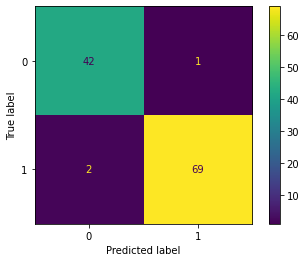

In [ ]:
# Confusion matrix
plot_confusion_matrix(lasso, X_test_transformed, y_test)

Because of the decrease in false negative count, the accuracy increased from 0.939 to 0.974. And the recall value increased from 0.915 to 0.972.

In [ ]:
# Performance report
print(classification_report(y_test, lasso_prediction, digits=3))

              precision    recall  f1-score   support

           0      0.955     0.977     0.966        43
           1      0.986     0.972     0.979        71

    accuracy                          0.974       114
   macro avg      0.970     0.974     0.972       114
weighted avg      0.974     0.974     0.974       114



LASSO's coefficients decreased a lot compared to the logistic regression coefficients. As a result, about half of the features have a coefficient of zero.

So LASSO gives us a simpler model with better performance.

In [ ]:
# Model coefficients
lassoCoeff = pd.concat([pd.DataFrame(X_test_transformed.columns),pd.DataFrame(np.transpose(lasso.coef_))], axis = 1)
lassoCoeff.columns=['Variable','Coefficient']
lassoCoeff['Coefficient_Abs']=lassoCoeff['Coefficient'].apply(abs)
lassoCoeff.sort_values(by='Coefficient_Abs', ascending=False)

,Variable,Coefficient,Coefficient_Abs
20,worst area,-3.150223,3.150223
16,radius error,-2.470708,2.470708
7,mean concave points,-2.422881,2.422881
29,worst texture,-1.852427,1.852427
23,worst concavity,-1.291266,1.291266
28,worst symmetry,-1.031646,1.031646
1,compactness error,0.891226,0.891226
26,worst radius,-0.737042,0.737042
18,symmetry error,0.458922,0.458922
17,smoothness error,-0.433104,0.433104


# Step 7: Ridge

In step 7, we will run Ridge regression by changing the penalty to l2.

In [ ]:
# Run model
ridge = LogisticRegression(penalty='l2', random_state=0).fit(X_train_transformed, y_train)

# Make prediction
ridge_prediction = ridge.predict(X_test_transformed)

# Get predicted probability
ridge_pred_Prob = ridge.predict_proba(X_test_transformed)[:,1]

The ROC/AUC value is 0.9974, which is slightly higher than 0.9967 for LASSO.

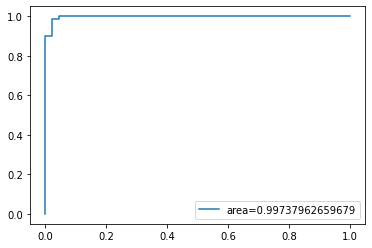

In [ ]:
# Get the false positive rate and true positive rate
fpr,tpr, _= roc_curve(y_test,ridge_pred_Prob)

# Get auc value
auc = roc_auc_score(y_test,ridge_pred_Prob)

# Plot the chart
plt.plot(fpr,tpr,label="area="+str(auc))
plt.legend(loc=4)

The log loss decreased from LASSO regression's 0.0685 to 0.0601. That's an  improvement too.

In [ ]:
# Calculate log loss
log_loss(y_test,ridge_pred_Prob)

0.06014109569918717

The confusion matrix shows the same false positive count of 2, and the false negative count of 1.

Although the total number of incorrect predictions is 3, the same as LASSO regression, Ridge regression has better performance because the false negative decreased by 1.

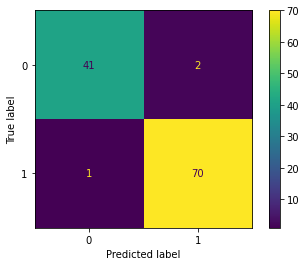

In [ ]:
# Confusion matrix
plot_confusion_matrix(ridge, X_test_transformed, y_test)

Because the number of incorrect predictions is the same between LASSO and Ridge, the accuracy is the same at 0.974. Because the false negative count decreased from 2 to 1, the recall value increased from 0.972 to 0.986.

In [ ]:
# Performance matrix
print(classification_report(y_test, ridge_prediction, digits=3))

              precision    recall  f1-score   support

           0      0.976     0.953     0.965        43
           1      0.972     0.986     0.979        71

    accuracy                          0.974       114
   macro avg      0.974     0.970     0.972       114
weighted avg      0.974     0.974     0.974       114



Ridge's coefficients decreased slightly compared to the LASSO regression coefficients. Some of the features have a coefficient close to zero, but none of them equals zero.

In [ ]:
# Model coefficients
ridgeCoeff = pd.concat([pd.DataFrame(X_test_transformed.columns),pd.DataFrame(np.transpose(ridge.coef_))], axis = 1)
ridgeCoeff.columns=['Variable','Coefficient']
ridgeCoeff['Coefficient_Abs']=ridgeCoeff['Coefficient'].apply(abs)
ridgeCoeff.sort_values(by='Coefficient_Abs', ascending=False)

,Variable,Coefficient,Coefficient_Abs
29,worst texture,-1.342188,1.342188
16,radius error,-1.271147,1.271147
28,worst symmetry,-1.208531,1.208531
7,mean concave points,-1.117021,1.117021
23,worst concavity,-0.945714,0.945714
0,area error,-0.909800,0.909800
26,worst radius,-0.878610,0.878610
20,worst area,-0.846559,0.846559
8,mean concavity,-0.796771,0.796771
22,worst concave points,-0.773436,0.773436


Based on the performance comparison, we can see that Ridge has slightly better performance than LASSO, but LASSO has a simpler model than Ridge.

# Step 8: Elastic Net

In step 8, we will run elastic net regression by changing the penalty to `'elasticnet'`. `l1_ratio=0.5` means that the elastic net uses 50% LASSO and 50% Ridge.

In [ ]:
# Run model
elasticNet = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, random_state=0).fit(X_train_transformed, y_train)

# Make prediction
elasticNet_prediction = elasticNet.predict(X_test_transformed)

# Get predicted probability
elasticNet_pred_Prob = elasticNet.predict_proba(X_test_transformed)[:,1]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


The ROC/AUC value for the elastic net is 0.9974, which is about the same as the Ridge regression.

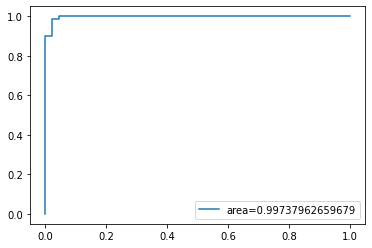

In [ ]:
# Get the false positive rate and true positive rate
fpr,tpr, _ = roc_curve(y_test,elasticNet_pred_Prob)

# Get auc value
auc = roc_auc_score(y_test,elasticNet_pred_Prob)

# Plot the chart
plt.plot(fpr,tpr,label="area="+str(auc))
plt.legend(loc=4)

The log loss decreased from Ridge regression's 0.0601 to 0.0597. That's a slight improvement.

In [ ]:
# Calculate log loss
log_loss(y_test,elasticNet_pred_Prob)

0.05970787798591165

The confusion matrix shows the same false negative count of 1, and the false positive count decreased from 2 to 1.

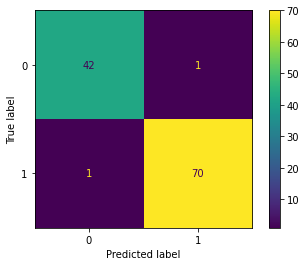

In [ ]:
# Confusion matrix
plot_confusion_matrix(elasticNet, X_test_transformed, y_test)

Because the number of incorrect predictions decreased compared to LASSO and Ridge, the accuracy increased from 0.974 to 0.982. The recall value is the same at 0.986.

In [ ]:
# Performance report
print(classification_report(y_test, elasticNet_prediction, digits=3))

              precision    recall  f1-score   support

           0      0.977     0.977     0.977        43
           1      0.986     0.986     0.986        71

    accuracy                          0.982       114
   macro avg      0.981     0.981     0.981       114
weighted avg      0.982     0.982     0.982       114



Ridge's coefficients were set to zeros for some features, but the number of features with 0 coefficient is smaller than LASSO.

In [ ]:
# Model coefficients
elasticNetCoeff = pd.concat([pd.DataFrame(X_test_transformed.columns),pd.DataFrame(np.transpose(elasticNet.coef_))], axis = 1)
elasticNetCoeff.columns=['Variable','Coefficient']
elasticNetCoeff['Coefficient_Abs']=elasticNetCoeff['Coefficient'].apply(abs)
elasticNetCoeff.sort_values(by='Coefficient_Abs', ascending=False)

,Variable,Coefficient,Coefficient_Abs
29,worst texture,-1.102631,1.102631
16,radius error,-1.046414,1.046414
28,worst symmetry,-0.947421,0.947421
7,mean concave points,-0.862021,0.862021
26,worst radius,-0.841379,0.841379
22,worst concave points,-0.803826,0.803826
20,worst area,-0.792420,0.792420
23,worst concavity,-0.784307,0.784307
0,area error,-0.718652,0.718652
27,worst smoothness,-0.692398,0.692398


# Step 9: Put All Code Together

In [ ]:
###### Step 1: Import Libraries

# Dataset
from sklearn import datasets

# Data processing
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt

# Standardize the data
from sklearn.preprocessing import StandardScaler

# Model and performance evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, classification_report, log_loss, roc_curve, roc_auc_score


###### Step 2: Read In Data

# Load the breast cancer dataset
data = datasets.load_breast_cancer()

# Put the data in pandas dataframe format
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target']=data.target

# Check the data information
df.info()

# Check the target value distribution
df['target'].value_counts(normalize=True)


###### Step 3: Train Test Split

# Train test split
X_train, X_test, y_train, y_test = train_test_split(df[df.columns.difference(['target'])], df['target'], test_size=0.2, random_state=42)

# Check the number of records in training and testing dataset.
print(f'The training dataset has {len(X_train)} records.')
print(f'The testing dataset has {len(X_test)} records.')


###### Step 4: Standardization

# Initiate scaler
sc = StandardScaler()

# Standardize the training dataset
X_train_transformed = pd.DataFrame(sc.fit_transform(X_train),index=X_train.index, columns=X_train.columns)

# Standardized the testing dataset
X_test_transformed = pd.DataFrame(sc.transform(X_test),index=X_test.index, columns=X_test.columns)

# Summary statistics after standardization
X_train_transformed.describe().T

# Summary statistics before standardization
X_train.describe().T


###### Step 5: Logistic Regression With No Regularization

# Check default values
LogisticRegression()

# Run model
logistic = LogisticRegression(penalty='none', random_state=0).fit(X_train_transformed, y_train)

# Make prediction
logistic_prediction = logistic.predict(X_test_transformed)

# Get predicted probability
logistic_pred_Prob = logistic.predict_proba(X_test_transformed)[:,1]

# Get the false positive rate and true positive rate
fpr,tpr, _=roc_curve(y_test,logistic_pred_Prob)

# Get auc value
auc=roc_auc_score(y_test,logistic_pred_Prob)

# Plot the chart
plt.plot(fpr,tpr,label="area="+str(auc))
plt.legend(loc=4)

# Caclulate log loss
log_loss(y_test,logistic_pred_Prob)

# Confusion matrix
plot_confusion_matrix(logistic, X_test_transformed, y_test)

# Performance report
print(classification_report(y_test, logistic_prediction, digits=3))

# Model coefficients
LogisticCoeff = pd.concat([pd.DataFrame(X_test_transformed.columns),pd.DataFrame(np.transpose(logistic.coef_))], axis = 1)
LogisticCoeff.columns=['Variable','Coefficient']
LogisticCoeff['Coefficient_Abs']=LogisticCoeff['Coefficient'].apply(abs)
LogisticCoeff.sort_values(by='Coefficient_Abs', ascending=False)


###### Step 6: LASSO

# Run model
lasso = LogisticRegression(penalty='l1', solver='liblinear', random_state=0).fit(X_train_transformed, y_train)

# Make prediction
lasso_prediction = lasso.predict(X_test_transformed)

# Get predicted probability
lasso_pred_Prob = lasso.predict_proba(X_test_transformed)[:,1]

# Get the false positive rate and true positive rate
fpr,tpr, _= roc_curve(y_test,lasso_pred_Prob)

# Get auc value
auc = roc_auc_score(y_test,lasso_pred_Prob)

# Plot the chart
plt.plot(fpr,tpr,label="area="+str(auc))
plt.legend(loc=4)

# Calculate log loss
log_loss(y_test,lasso_pred_Prob)

# Confusion matrix
plot_confusion_matrix(lasso, X_test_transformed, y_test)

# Performance report
print(classification_report(y_test, lasso_prediction, digits=3))

# Model coefficients
lassoCoeff = pd.concat([pd.DataFrame(X_test_transformed.columns),pd.DataFrame(np.transpose(lasso.coef_))], axis = 1)
lassoCoeff.columns=['Variable','Coefficient']
lassoCoeff['Coefficient_Abs']=lassoCoeff['Coefficient'].apply(abs)
lassoCoeff.sort_values(by='Coefficient_Abs', ascending=False)


###### Step 7: Ridge

# Run model
ridge = LogisticRegression(penalty='l2', random_state=0).fit(X_train_transformed, y_train)

# Make prediction
ridge_prediction = ridge.predict(X_test_transformed)

# Get predicted probability
ridge_pred_Prob = ridge.predict_proba(X_test_transformed)[:,1]

# Get the false positive rate and true positive rate
fpr,tpr, _= roc_curve(y_test,ridge_pred_Prob)

# Get auc value
auc = roc_auc_score(y_test,ridge_pred_Prob)

# Plot the chart
plt.plot(fpr,tpr,label="area="+str(auc))
plt.legend(loc=4)

# Calculate log loss
log_loss(y_test,ridge_pred_Prob)

# Confusion matrix
plot_confusion_matrix(ridge, X_test_transformed, y_test)

# Performance matrix
print(classification_report(y_test, ridge_prediction, digits=3))

# Model coefficients
ridgeCoeff = pd.concat([pd.DataFrame(X_test_transformed.columns),pd.DataFrame(np.transpose(ridge.coef_))], axis = 1)
ridgeCoeff.columns=['Variable','Coefficient']
ridgeCoeff['Coefficient_Abs']=ridgeCoeff['Coefficient'].apply(abs)
ridgeCoeff.sort_values(by='Coefficient_Abs', ascending=False)


###### Step 8: Elastic Net

# Run model
elasticNet = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, random_state=0).fit(X_train_transformed, y_train)

# Make prediction
elasticNet_prediction = elasticNet.predict(X_test_transformed)

# Get predicted probability
elasticNet_pred_Prob = elasticNet.predict_proba(X_test_transformed)[:,1]

# Get the false positive rate and true positive rate
fpr,tpr, _ = roc_curve(y_test,elasticNet_pred_Prob)

# Get auc value
auc = roc_auc_score(y_test,elasticNet_pred_Prob)

# Plot the chart
plt.plot(fpr,tpr,label="area="+str(auc))
plt.legend(loc=4)

# Calculate log loss
log_loss(y_test,elasticNet_pred_Prob)

# Confusion matrix
plot_confusion_matrix(elasticNet, X_test_transformed, y_test)

# Performance report
print(classification_report(y_test, elasticNet_prediction, digits=3))

# Model coefficients
elasticNetCoeff = pd.concat([pd.DataFrame(X_test_transformed.columns),pd.DataFrame(np.transpose(elasticNet.coef_))], axis = 1)
elasticNetCoeff.columns=['Variable','Coefficient']
elasticNetCoeff['Coefficient_Abs']=elasticNetCoeff['Coefficient'].apply(abs)
elasticNetCoeff.sort_values(by='Coefficient_Abs', ascending=False)


# Summary

In this tutorial, we covered
* What's the difference between LASSO (L1), Ridge (L2), and Elastic Net?
* How to run LASSO for the classification model?
* How to run Ridge for classification model?
* How to run Elastic Net for classification model?
* How to compare the performance of LASSO, Ridge, and Elastic Net?

We can see that regularization improved the model performance significantly than not using regularization.

Elastic net has the best performance among the three regularization algorithms, followed by Ridge and LASSO regression. However, this may not be true for all the datasets. Therefore, I suggest trying all three algorithms for your project, doing hyperparameter tuning, and choosing the algorithm that works best for your dataset.

# Recommendation For You

- [GrabNGoInfo Machine Learning Tutorials Inventory](https://medium.com/grabngoinfo/grabngoinfo-machine-learning-tutorials-inventory-9b9d78ebdd67)
- [Hierarchical Topic Model for Airbnb Reviews](https://medium.com/p/hierarchical-topic-model-for-airbnb-reviews-f772eaa30434)
- [3 Ways for Multiple Time Series Forecasting Using Prophet in Python](https://medium.com/p/3-ways-for-multiple-time-series-forecasting-using-prophet-in-python-7a0709a117f9)
- [Time Series Anomaly Detection Using Prophet in Python](https://medium.com/grabngoinfo/time-series-anomaly-detection-using-prophet-in-python-877d2b7b14b4)
- [Time Series Causal Impact Analysis in Python](https://medium.com/grabngoinfo/time-series-causal-impact-analysis-in-python-63eacb1df5cc)
- [Hyperparameter Tuning For XGBoost](https://medium.com/p/hyperparameter-tuning-for-xgboost-91449869c57e)
- [Four Oversampling And Under-Sampling Methods For Imbalanced Classification Using Python](https://medium.com/p/four-oversampling-and-under-sampling-methods-for-imbalanced-classification-using-python-7304aedf9037)
- [Five Ways To Create Tables In Databricks](https://medium.com/grabngoinfo/five-ways-to-create-tables-in-databricks-cd3847cfc3aa)
- [Explainable S-Learner Uplift Model Using Python Package CausalML](https://medium.com/grabngoinfo/explainable-s-learner-uplift-model-using-python-package-causalml-a3c2bed3497c)
- [One-Class SVM For Anomaly Detection](https://medium.com/p/one-class-svm-for-anomaly-detection-6c97fdd6d8af)
- [Recommendation System: Item-Based Collaborative Filtering](https://medium.com/grabngoinfo/recommendation-system-item-based-collaborative-filtering-f5078504996a)
- [Hyperparameter Tuning for Time Series Causal Impact Analysis in Python](https://medium.com/grabngoinfo/hyperparameter-tuning-for-time-series-causal-impact-analysis-in-python-c8f7246c4d22)
- [Hyperparameter Tuning and Regularization for Time Series Model Using Prophet in Python](https://medium.com/grabngoinfo/hyperparameter-tuning-and-regularization-for-time-series-model-using-prophet-in-python-9791370a07dc)
- [Multivariate Time Series Forecasting with Seasonality and Holiday Effect Using Prophet in Python](https://medium.com/p/multivariate-time-series-forecasting-with-seasonality-and-holiday-effect-using-prophet-in-python-d5d4150eeb57)
- [LASSO (L1) Vs Ridge (L2) Vs Elastic Net Regularization For Classification Model](https://medium.com/towards-artificial-intelligence/lasso-l1-vs-ridge-l2-vs-elastic-net-regularization-for-classification-model-409c3d86f6e9)
- [S Learner Uplift Model for Individual Treatment Effect and Customer Segmentation in Python](https://medium.com/grabngoinfo/s-learner-uplift-model-for-individual-treatment-effect-and-customer-segmentation-in-python-9d410746e122)
- [How to Use R with Google Colab Notebook](https://medium.com/p/how-to-use-r-with-google-colab-notebook-610c3a2f0eab)

# Reference

* [LASSO regression explained](https://www.youtube.com/watch?v=NGf0voTMlcs)
* [Ridge regression explained](https://www.youtube.com/watch?v=Q81RR3yKn30)
* [sklearn documentation on logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
* [sklearn documenation on standard scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)